In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('./helper_functions')
sys.path.append('./helper_functions/bemColors_lib')
sys.path.append('../../Electrodes')
from helper_functions import plot_mesh
from bemColors import bemColors
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from bem import Electrodes, Sphere, Mesh, Grid, Configuration, Result

from multipoles import MultipoleControl
from plottingfuncns import *

import time
from helper_functions import run_job, write_pickle

stl_unit = 1e-3 # meters

# this is the unit for our Mesh structure
# in the following code, this is the default unit for python variables
mesh_unit = 1e-3 # meters

In [3]:
# load stl file
from bem.formats import stl
filename = 'glasstrapcolor'
s_nta = stl.read_stl(open(f"{filename}.stl", "rb"))

In [4]:
# print colors needs to be named
bemcolors = bemColors(np.array(list(set(s_nta[2]))),('fusion360','export_stl'))
bemcolors.stl_colors()

colors in the stl:
['bem6']
['bem13']
['bem19']
['bem11']
['bem17']
['bem15']
['bem1']
['bem12']
['bem5']
['bem22']
['bem18']
['bem16']
['bem3']
['bem7']
['bem23']
['bem9']
['bem4']
['bem2']
['bem20']
['bem10']
['bem14']
['bem8']
['bem21']
['_unkColor0']
24 colors in total


In [5]:
# assign a name for each color
electrodes = {
    ('bem1', 'DC1'),
    ('bem2', 'DC2'),
    ('bem3', 'DC3'),
    ('bem4', 'DC4'),
    ('bem5', 'DC5'),
    ('bem6', 'DC6'),
    ('bem7', 'DC7'),
    ('bem8', 'DC8'),
    ('bem9', 'DC9'),
    ('bem10', 'DC10'),
    ('bem11', 'DC11'),
    ('bem12', 'DC12'),
    ('bem13', 'DC13'),
    ('bem14', 'DC14'),
    ('bem15', 'DC15'),
    ('bem16', 'DC16'),
    ('bem17', 'DC17'),
    ('bem18', 'DC18'),
    ('bem19', 'DC19'),
    ('bem20', 'DC20'),
    ('bem21', 'DC21'),
    ('bem22', 'RF'),
    ('bem23', 'GND'),
}
for e in electrodes:
    bemcolors.color_electrode(*e)

# print colors still with no name. These meshes will be neglected in the following codes
bemcolors.dropped_colors()

dropped ['_unkColor0']
1 colors dropped


dropping 20083


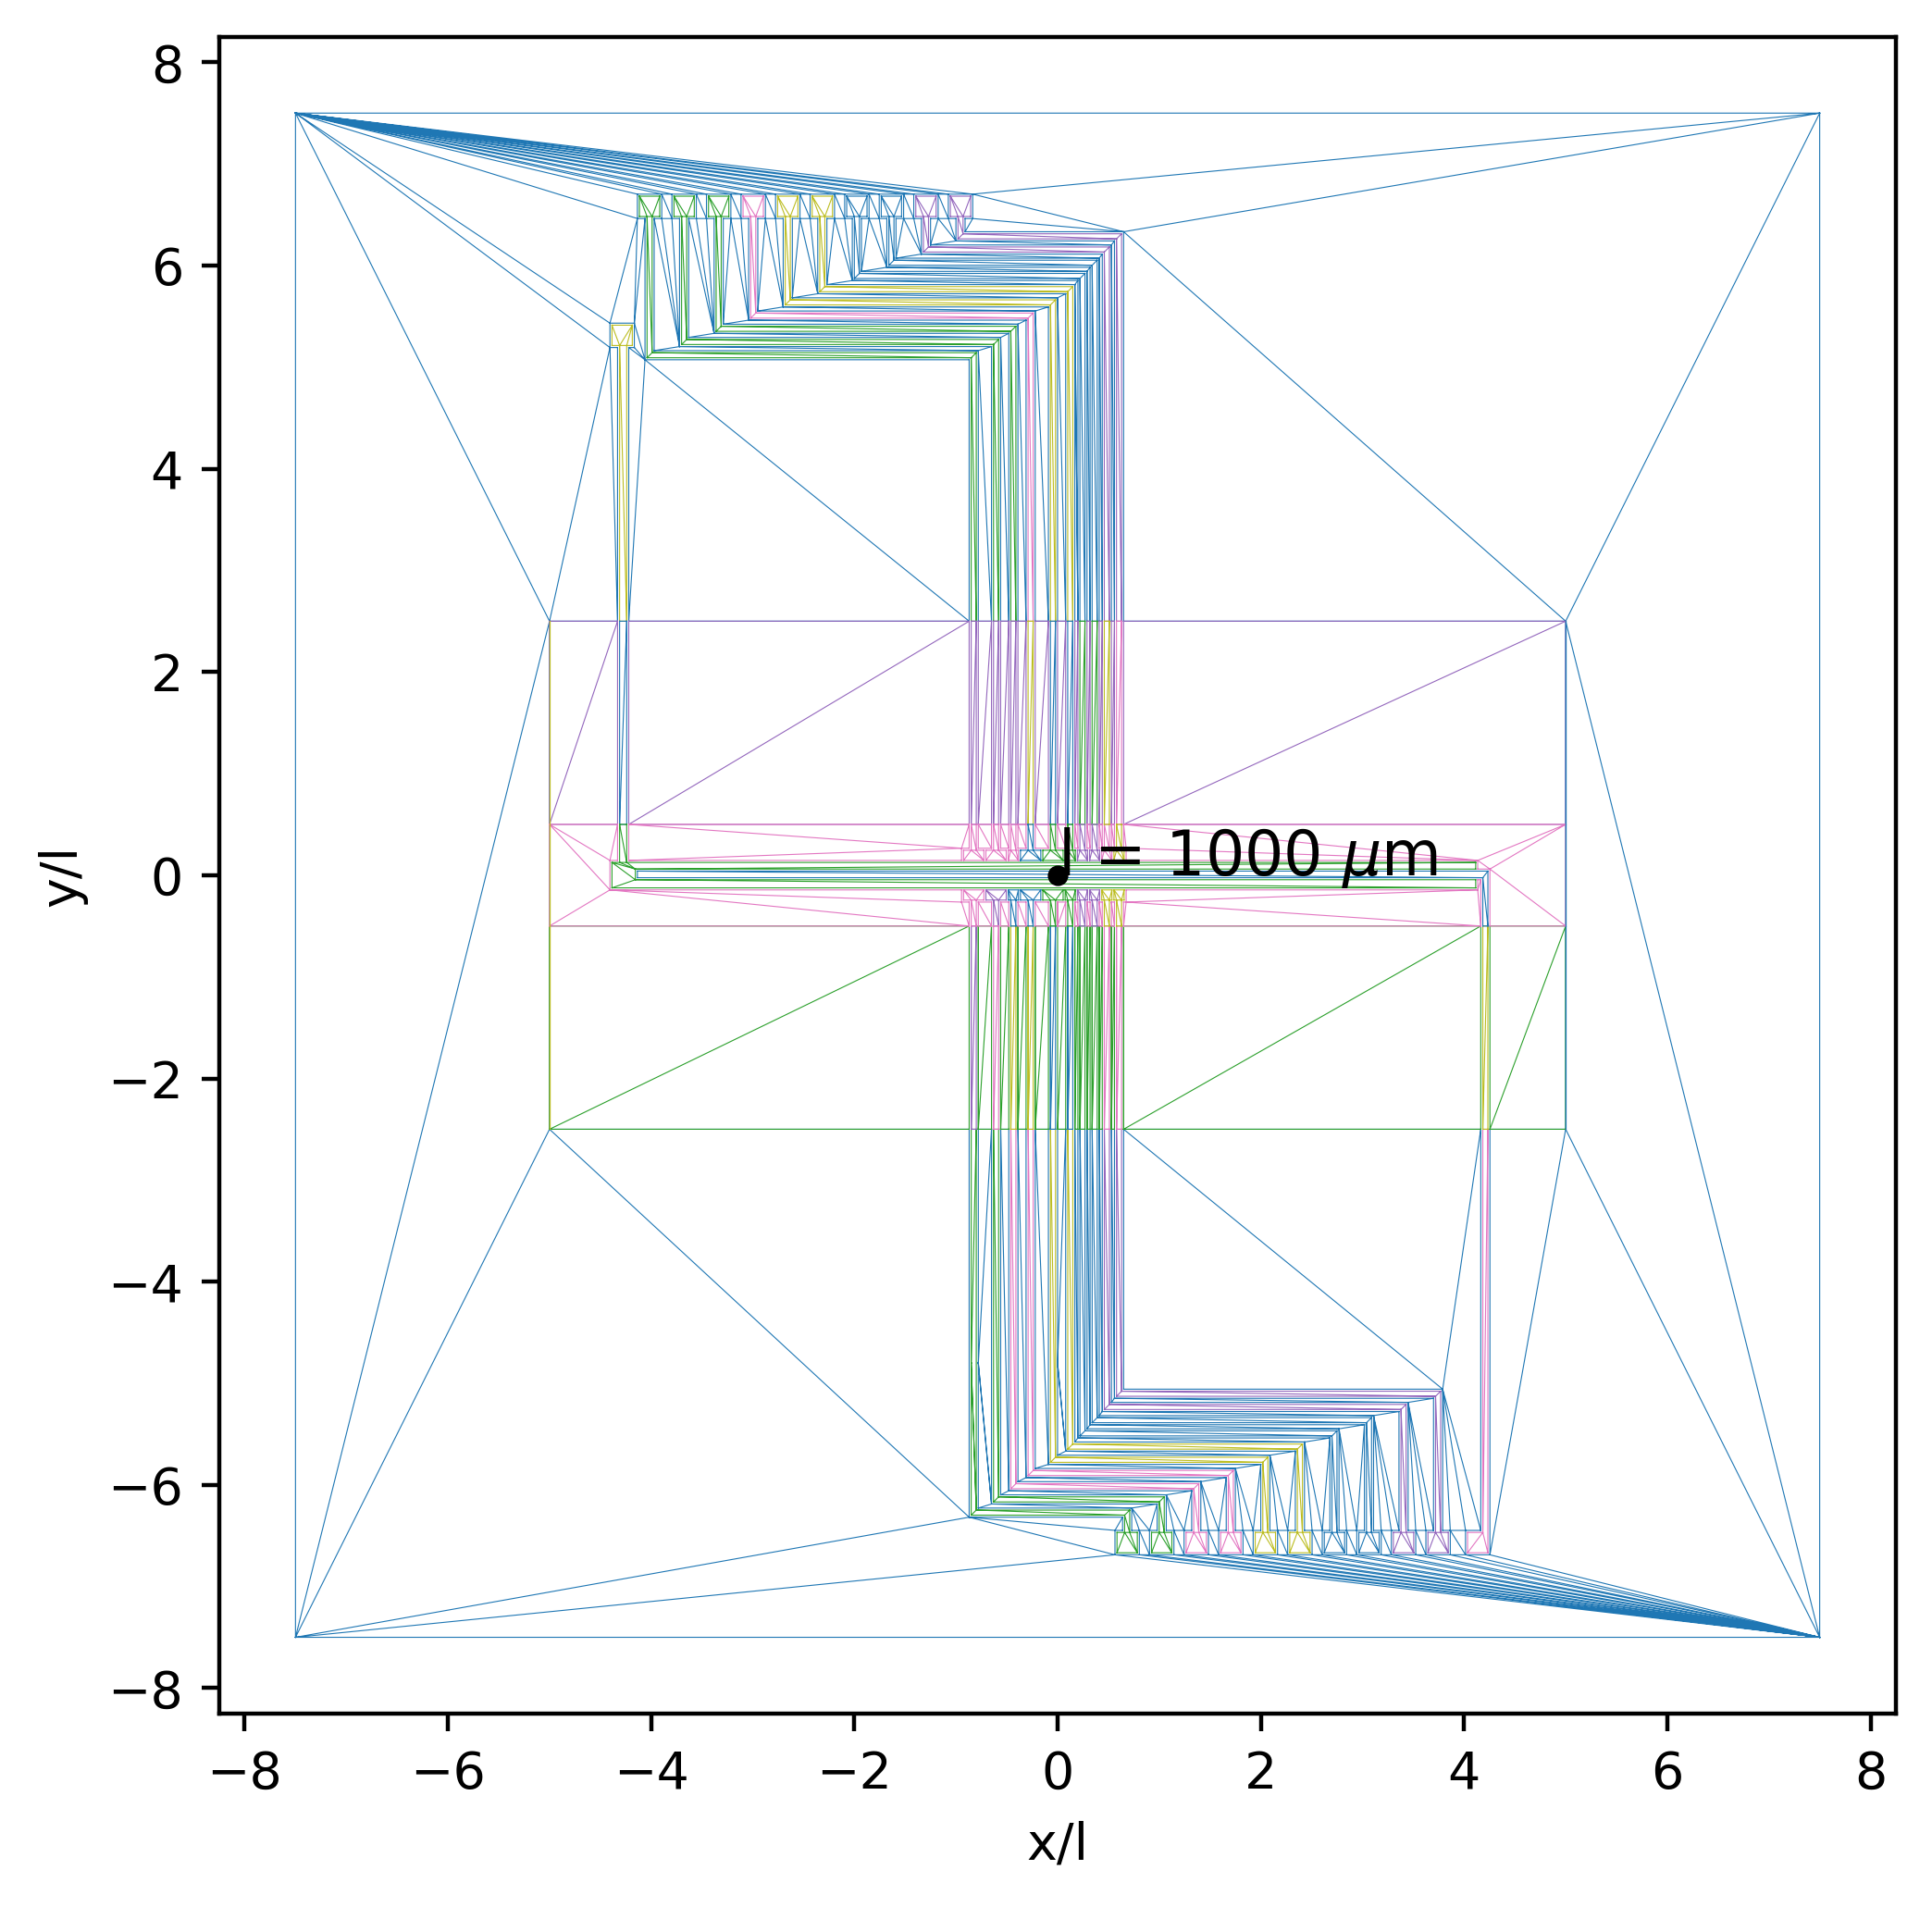

In [6]:
# read stl into mesh with electrode names
# unnamed meshes will not be imported at all
mesh = Mesh.from_mesh(stl.stl_to_mesh(*s_nta, scale=1, rename=bemcolors.electrode_colors, quiet=True))

mpl.rcParams['lines.linewidth'] = 0.2 

# to plot an approriate area of the trap, you have to tune the first, second and fourth parameter
plot_mesh(0,0,mesh,mesh_unit,'fig1.png', save=True, dpi=1000)

start triangulate GND
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
finish triangulate GND
start triangulate DC11
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
finish triangulate DC11
start triangulate DC15
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
finish triangulate DC15
start triangulate DC19
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
finish triangulate DC19
start triangulate DC18
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
finish triangulate DC18
start triangulate DC14
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
finish triangulate DC14
start triangulate DC12
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
finish triangulate DC12
start triangulate DC16
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
('final opts', 'q3Qzr')
fi

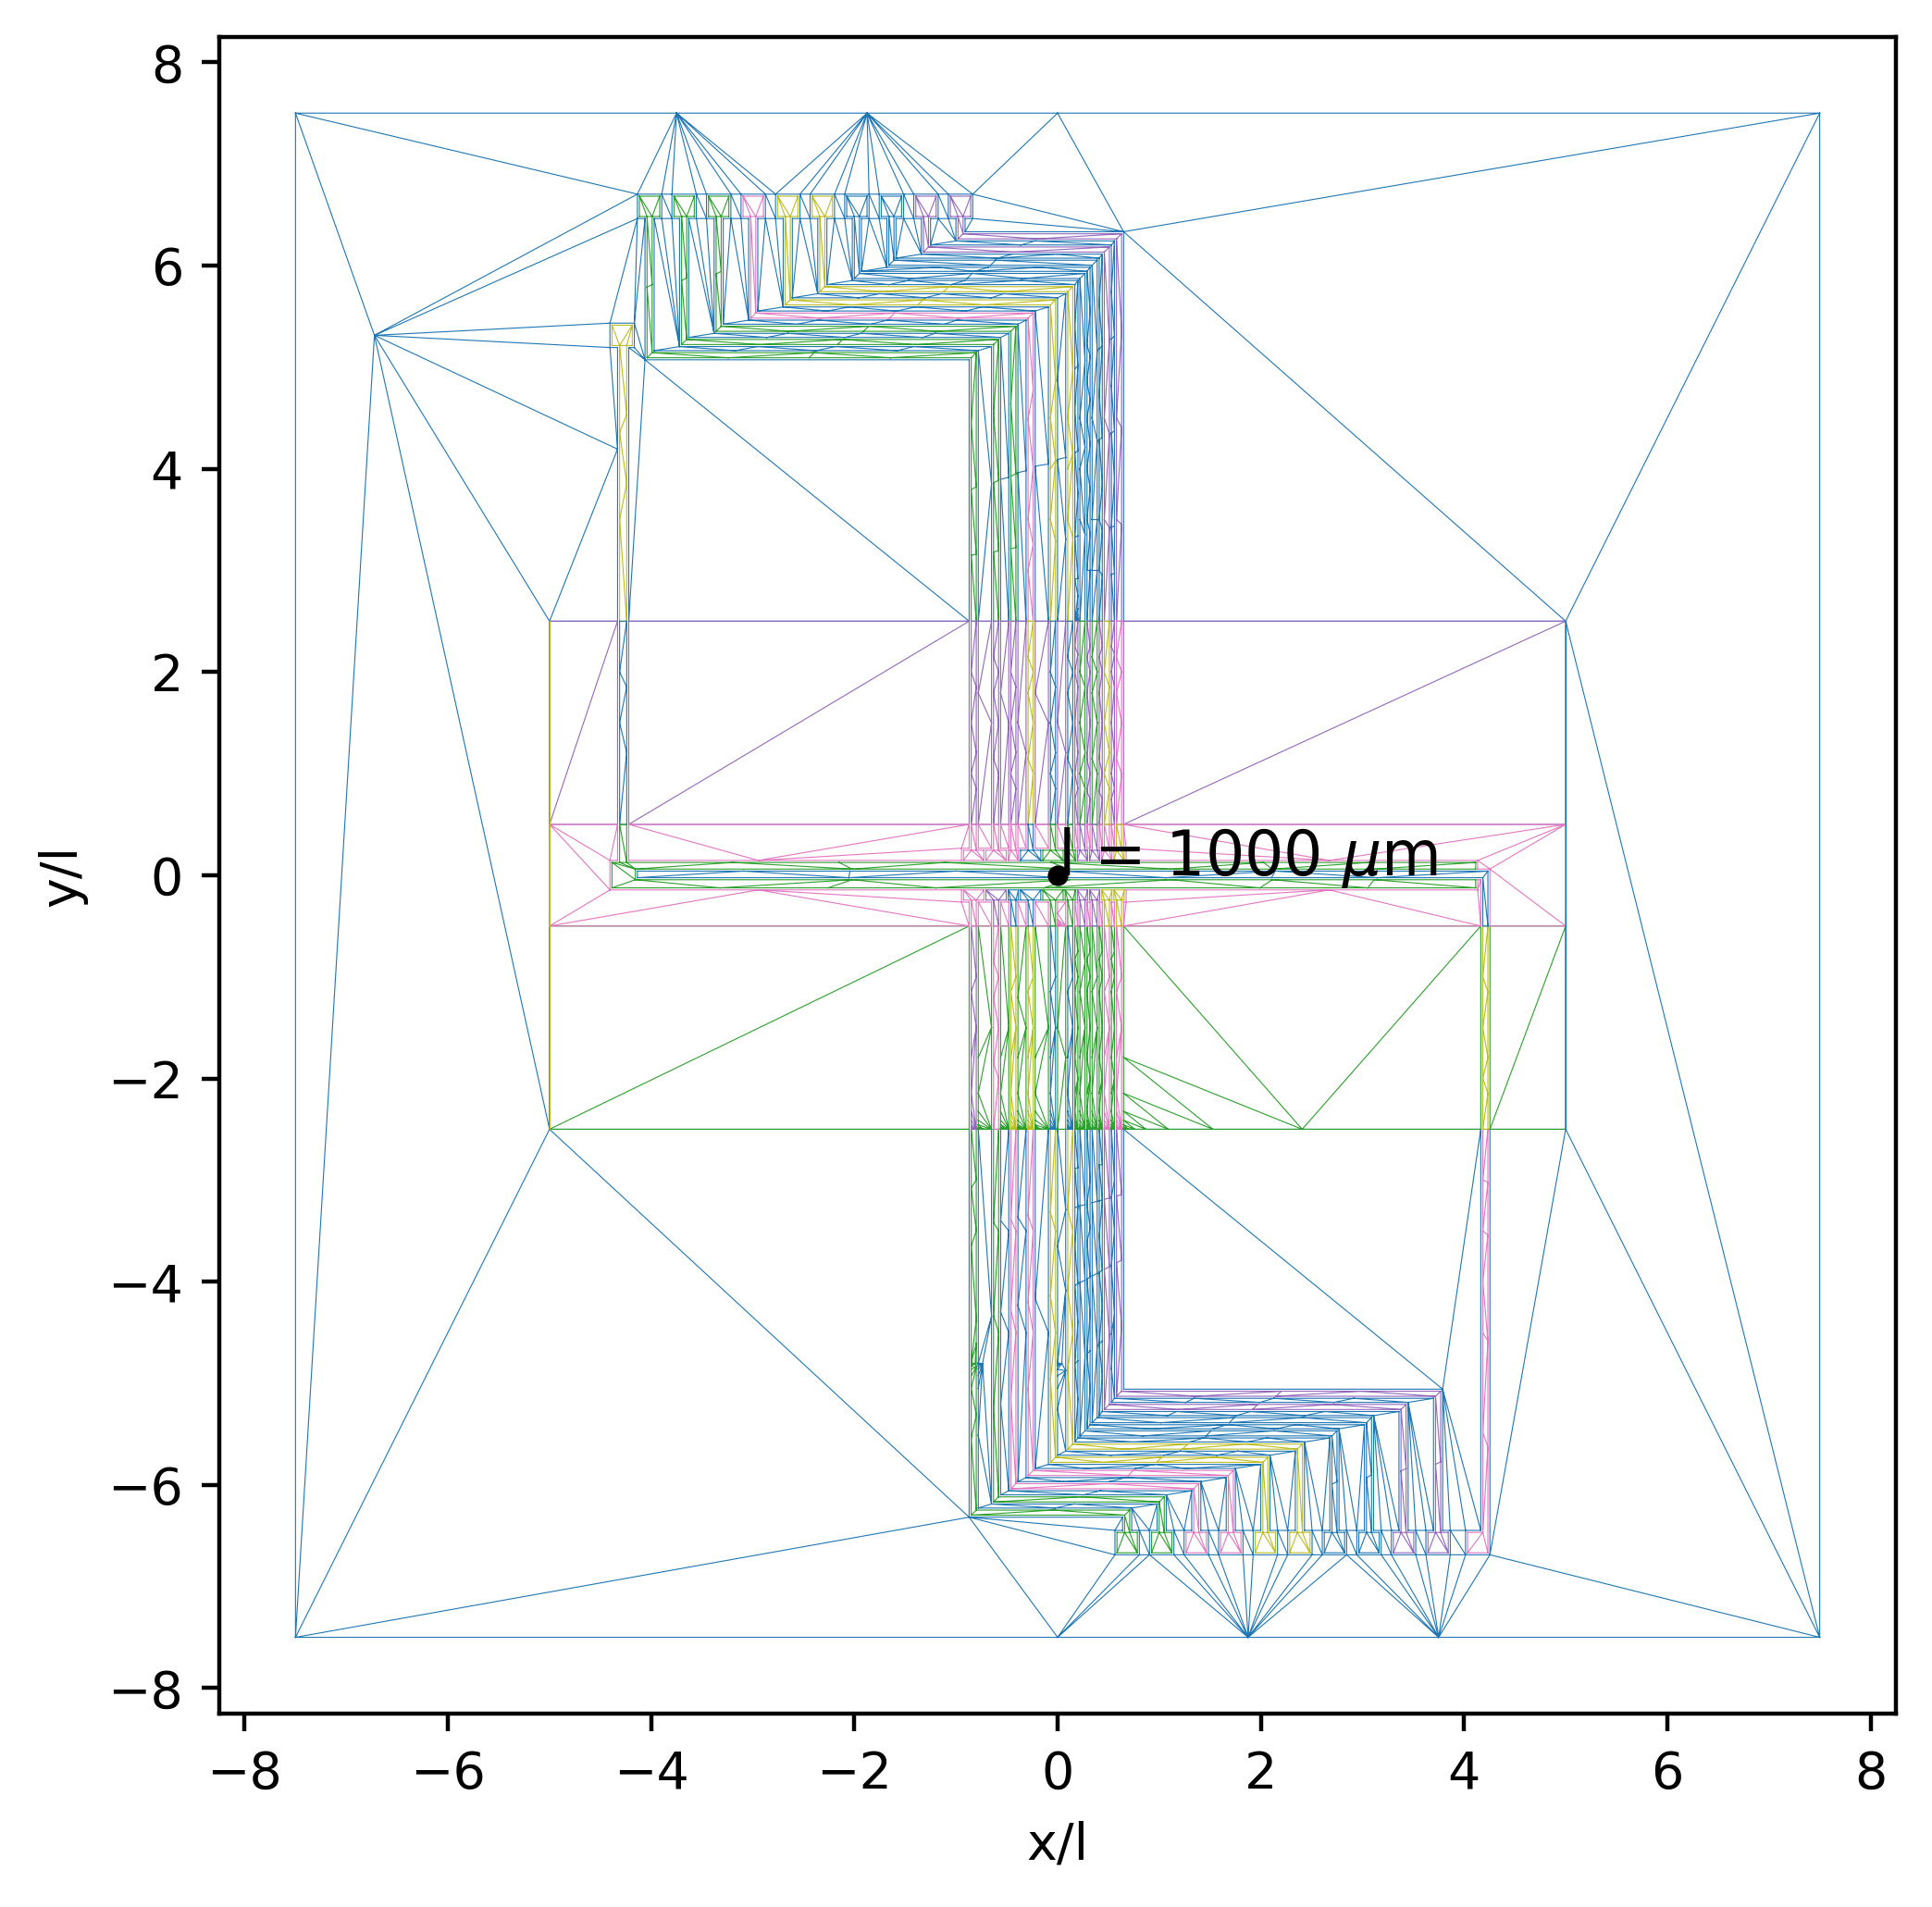

In [7]:
# Triangulation documentation: https://www.cs.cmu.edu/~quake/triangle.switch.html

# first triangulation 
mesh.triangulate(opts="q3Q",new = False)
plot_mesh(0,0,mesh,mesh_unit,'fig2.png', save=True, dpi=1000)

In [8]:
# here we define a spherical constriant zone:
# units are in mesh_units
xl = 0*72*1e-3
yl = 0*72*1e-3
zl = 2 + 1*72*1e-3
rad = 2*72*1e-3

# inside and outside that sphere, triangle density is:
inside=10e-4
outside=10






start triangulate GND
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
finish triangulate GND
start triangulate DC11
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
finish triangulate DC11
start triangulate DC15
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
finish triangulate DC15
start triangulate DC19
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
finish triangulate DC19
start triangulate DC18
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
finish triangulate DC18
start triangulate DC14
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
finish triangulate DC14
start triangulate DC12
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
('final opts', 'q30Qzra')
finish triangulate DC12
start triangulate DC16
('final opts', 'q30Qzra')


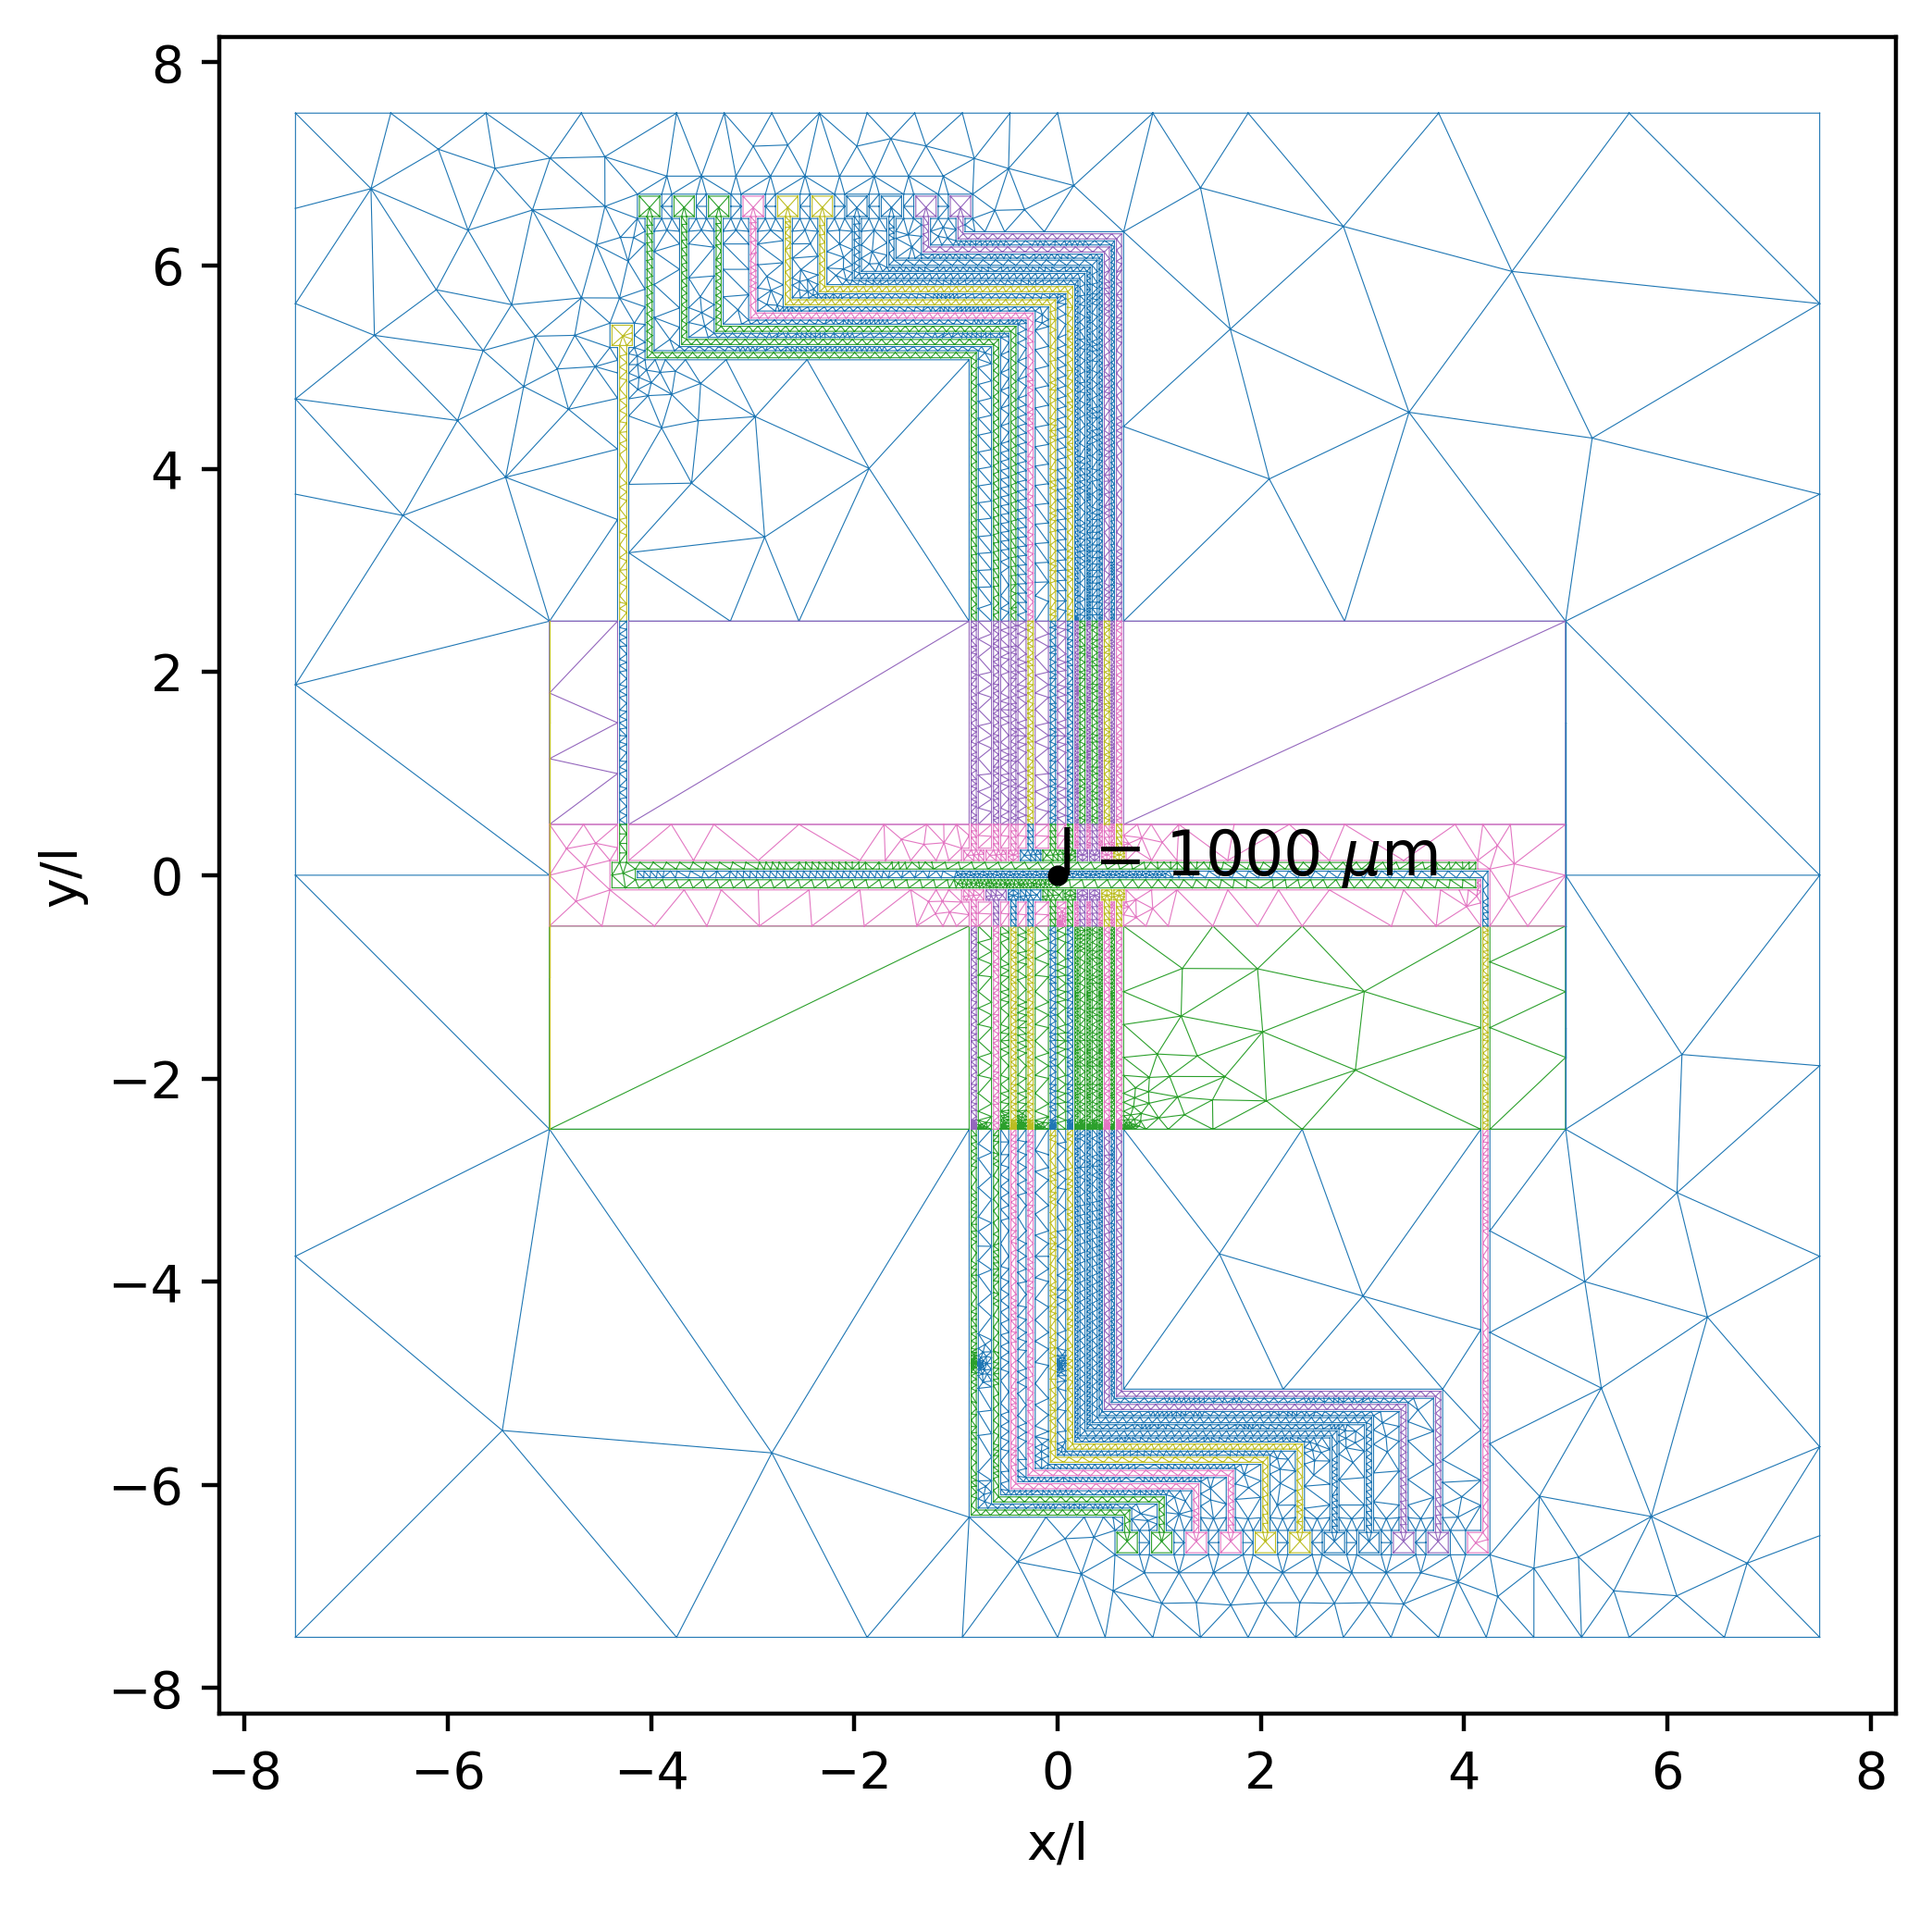

In [43]:
# second triangulation
# areas_from_constraints specifies sphere with finer mesh inside it.
 # "inside", "outside" set different mesh densities.Q
mesh.areas_from_constraints(Sphere(center=np.array([xl,yl,zl]),radius=rad, inside=inside, outside=outside))
mesh.triangulate(opts="q30Q",new = False)
plot_mesh(xl,yl,mesh,mesh_unit,'fig3.png', save=True, dpi=1000)

In [9]:
# save base mesh to a pickle file
fout_name = './intermediate_results/testmesh.pkl'
with open(fout_name,'wb') as f:
    data = (mesh_unit,xl,yl,zl,mesh)
    pickle.dump(data,f)

# Do BEM simulation in .py file then return

In [13]:
# import data, and define parameters
path = 'intermediate_results/field_result.pkl'
f = open(path, 'rb')
trap = pickle.load(f)

grid = trap

In [14]:
prefix = './intermediate_results/.vtks/htrapf'
result = Result.from_vtk(prefix, "RF")

p = result.pseudo_potential
maxp = np.amax(p)
print("p max", maxp)
x = grid.to_mgrid()[:, p.shape[0]//2]    # p.shape[0]/2 is in the middle of x.
p = p[p.shape[0]//2]    # get a slice of yz plane at x = p.shape[0]/2.
print("yz plane, RF pseudo")
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.contour(x[1], x[2], p, levels=np.linspace(0, 2e-2, 20), cmap=plt.cm.Reds)

p max 98.86266819


AttributeError: 'dict' object has no attribute 'to_mgrid'

In [19]:
###### setting up multipole expansion @ trap location #######
#xl, yl, zl define the origin at which we will do the multipole expansion
#i.e. they define where you want to trap

#strs are the string names of your DC electrodes (copy from loading pickle,
#I wrote it a second time so that the code runs in case you comment out that code)
strs = "DC1 DC2 DC3 DC4 DC5 DC6 DC7 DC8 DC9 DC10 DC11 DC12 DC13 DC14 DC15 DC16 DC17 DC18 DC19 DC20 DC21".split()
zl = 3.1*72*1e-3
xl = -0.051*72*1e-3
yl = 1.06*72*1e-3

position = [xl, yl, zl]

#ROI = 'range of interest', I believe
#It defines the volume region over which multipole expansion will be performed.
#nROI is the number of points that make up the dimensions of the volume of the ROI
#I believe it ends up being the indices of the 3-d array that you index so it is dimensionless
nROI = 5
roi = [nROI, nROI, nROI]
order = 2

#controlled electrodes- this will define which electrodes will be used to control your trap
controlled_electrodes = []

In [20]:
excl = {
    # "DC6": "gnd",
    #     "DC4": "gnd",
    #     "DC5": "gnd",
    #     "DC8": "gnd",
    #     "DC14": "DC13",
    #     "DC11": "gnd",
    #     "DC12": "gnd"
}

#build the controlled electrodes list, given the constraints of the 'excl' list
for electrode in strs:
    if electrode in excl and excl[electrode] != "gnd":
        trap['electrodes'][excl[electrode]]["potential"] = trap['electrodes'][excl[electrode]]["potential"] + \
                                                           trap['electrodes'][electrode]["potential"]
    elif electrode not in excl:
        controlled_electrodes.append(electrode)


#which multipoles you want to include in multipole calculations
used_order1multipoles = ['Ex', 'Ey', 'Ez']
used_order2multipoles = ['U1', 'U2', 'U3','U4','U5']
used_multipoles = used_order1multipoles + used_order2multipoles
print(used_multipoles)


# create MultipoleControl object
s = MultipoleControl(trap, position, roi, controlled_electrodes, used_multipoles, order)
###############################################################

################# writing to cfile ############################
#write solution text file (cfile, sqip uses .txt format tho)
#this will be generated in the 'Electrodes' directory
s.write_txt(module_path+'/inter_results/el3.5_4-5-6-8-11-12-gnd_13-14(feb2022_noU4)', strs, excl)
###############################################################


########## various plots of the expansion fields ##############
### TO DO: comments, checking multipoles generated, add RF electrode
# code to the bottom

print('Multipole names:', s.multipole_names)
print('Normalization factors:', s.normalization_factors)

['Ex', 'Ey', 'Ez', 'U1', 'U2', 'U3', 'U4', 'U5']


ValueError: ECOS cannot handle sparse data with nnz == 0; this is a bug in ECOS, and it indicates that your problem might have redundant constraints.